# Liver Patient Prediction Using Machine Learning

### Domain: Healthcare

### Objective:
To perform data analysis and predictive modeling on a liver disease dataset to identify key patterns and build accurate models for classifying liver disease presence.

# 1. Introduction

### i. Background of Liver Diseases

The liver is one of the most vital organs in the human body, responsible for a variety of crucial functions including detoxification, protein synthesis, production of biochemicals necessary for digestion, and regulation of glycogen storage. Given its essential role, any impairment in liver function can lead to serious health complications.


### ii. Importance of early prediction and ML application in healthcare.

The early detection of liver disease is critical for effective treatment and to prevent severe complications such as liver failure or cancer. However, early-stage liver disease is often asymptomatic, making it difficult to diagnose without laboratory testing. Therefore, predictive modeling using machine learning can play a transformative role by identifying high-risk individuals based on clinical and biochemical parameters. This not only aids doctors in faster decision-making but also reduces the load on diagnostic resources, especially in rural or underserved areas.

In this context, leveraging data-driven approaches to analyze liver patient data and build predictive models can significantly enhance the efficiency of disease screening and intervention planning.

### iii. Brief about the dataset 
The dataset used in this project consists of medical records collected from patients in the North Eastern region of Andhra Pradesh, India. It includes a total of 583 patient records, each described by various clinical and biochemical attributes relevant to liver function.

#### Out of these records:

- **416 patients** have been diagnosed with liver disease.

- **167 patients** do not have liver disease.

#### This information is captured in the "Target" column, which serves as the class label:

- **1** indicates a **liver disease patient**.

- **2** indicates a **non-liver disease patient**.

#### In terms of gender distribution:

- **441 records** belong to **Male patients**.

- **142 records** belong to **Female patients**.


The dataset includes important features such as age, bilirubin levels, liver enzymes, protein levels, and albumin/globulin ratios, all of which are key indicators of liver health. These attributes serve as inputs for exploratory analysis and machine learning model training to predict liver disease status effectively.



### iv. Attribute Descriptions and Their Relevance to Liver Disease

- **Age**: Older individuals are more prone to liver-related complications due to cumulative exposure to risk factors.


- **Gender**: Males generally have higher risk due to lifestyle factors like alcohol use; may influence disease distribution.


- **Total Bilirubin**: Elevated levels indicate impaired liver function or bile duct problems.
        Normal Range - 0.1 to 1.2 mg/dL
- **Direct Bilirubin**: High direct bilirubin suggests liver cells are unable to process bilirubin properly.
        Normal Range -  0.1 – 0.4 mg/dL
- **Alkaline Phosphotase (ALP)**: Increased ALP levels are often associated with bile duct obstruction or liver damage.
        Normal Range - 44-147 U/L
- **Alamine Aminotransferase (ALT or SGPT)**: High ALT indicates liver cell injury and is a key marker of liver inflammation.
        Normal Range - 7 – 56 U/L
- **Aspartate Aminotransferase (AST or SGOT)**: Raised AST levels signal liver or muscle damage, especially when AST > ALT.
        Normal Range - 5 – 40 U/L
- **Total Proteins**: Low protein levels may point to chronic liver disease affecting protein synthesis.
        Normal Range -  6.0 – 8.3 g/dL
- **Albumin**: Reduced albumin indicates poor liver function as it's synthesized in the liver.
        Normal Range - 3.5 – 5.0 g/dL
- **Albumin and Globulin Ratio**: An abnormal ratio can reflect liver dysfunction or chronic liver conditions.
        Normal Range - 0.8 – 2.0
- **Target**: Class label — `1` for liver disease and `2` for no disease; used for supervised learning.

# 2. Data Loading and Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### i. Loading Data

In [2]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### ii. Basic Check

In [3]:
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


In [8]:
df.shape

(583, 11)

In [9]:
df.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target'],
      dtype='object')

In [10]:
df.rename({'Total Bilirubin':'Total_Bilirubin','Direct Bilirubin':"Direct_Bilirubin",'Alkaline Phosphotase':"Alkaline_Phosphotase",'Alamine Aminotransferase':'Alamine_Aminotransferase','Aspartate Aminotransferase':'Aspartate_Aminotransferase','Total Protiens':'Total_Protiens','Albumin and Globulin Ratio':'Albumin_and_Globulin_Ratio'},axis=1,inplace=True)

In [11]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

# 3. Exploratory Data Analysis (EDA)

In [13]:
dfn = df.drop(['Gender','Target'],axis=1)

In [14]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(df)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### i. Univarient Analysis

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

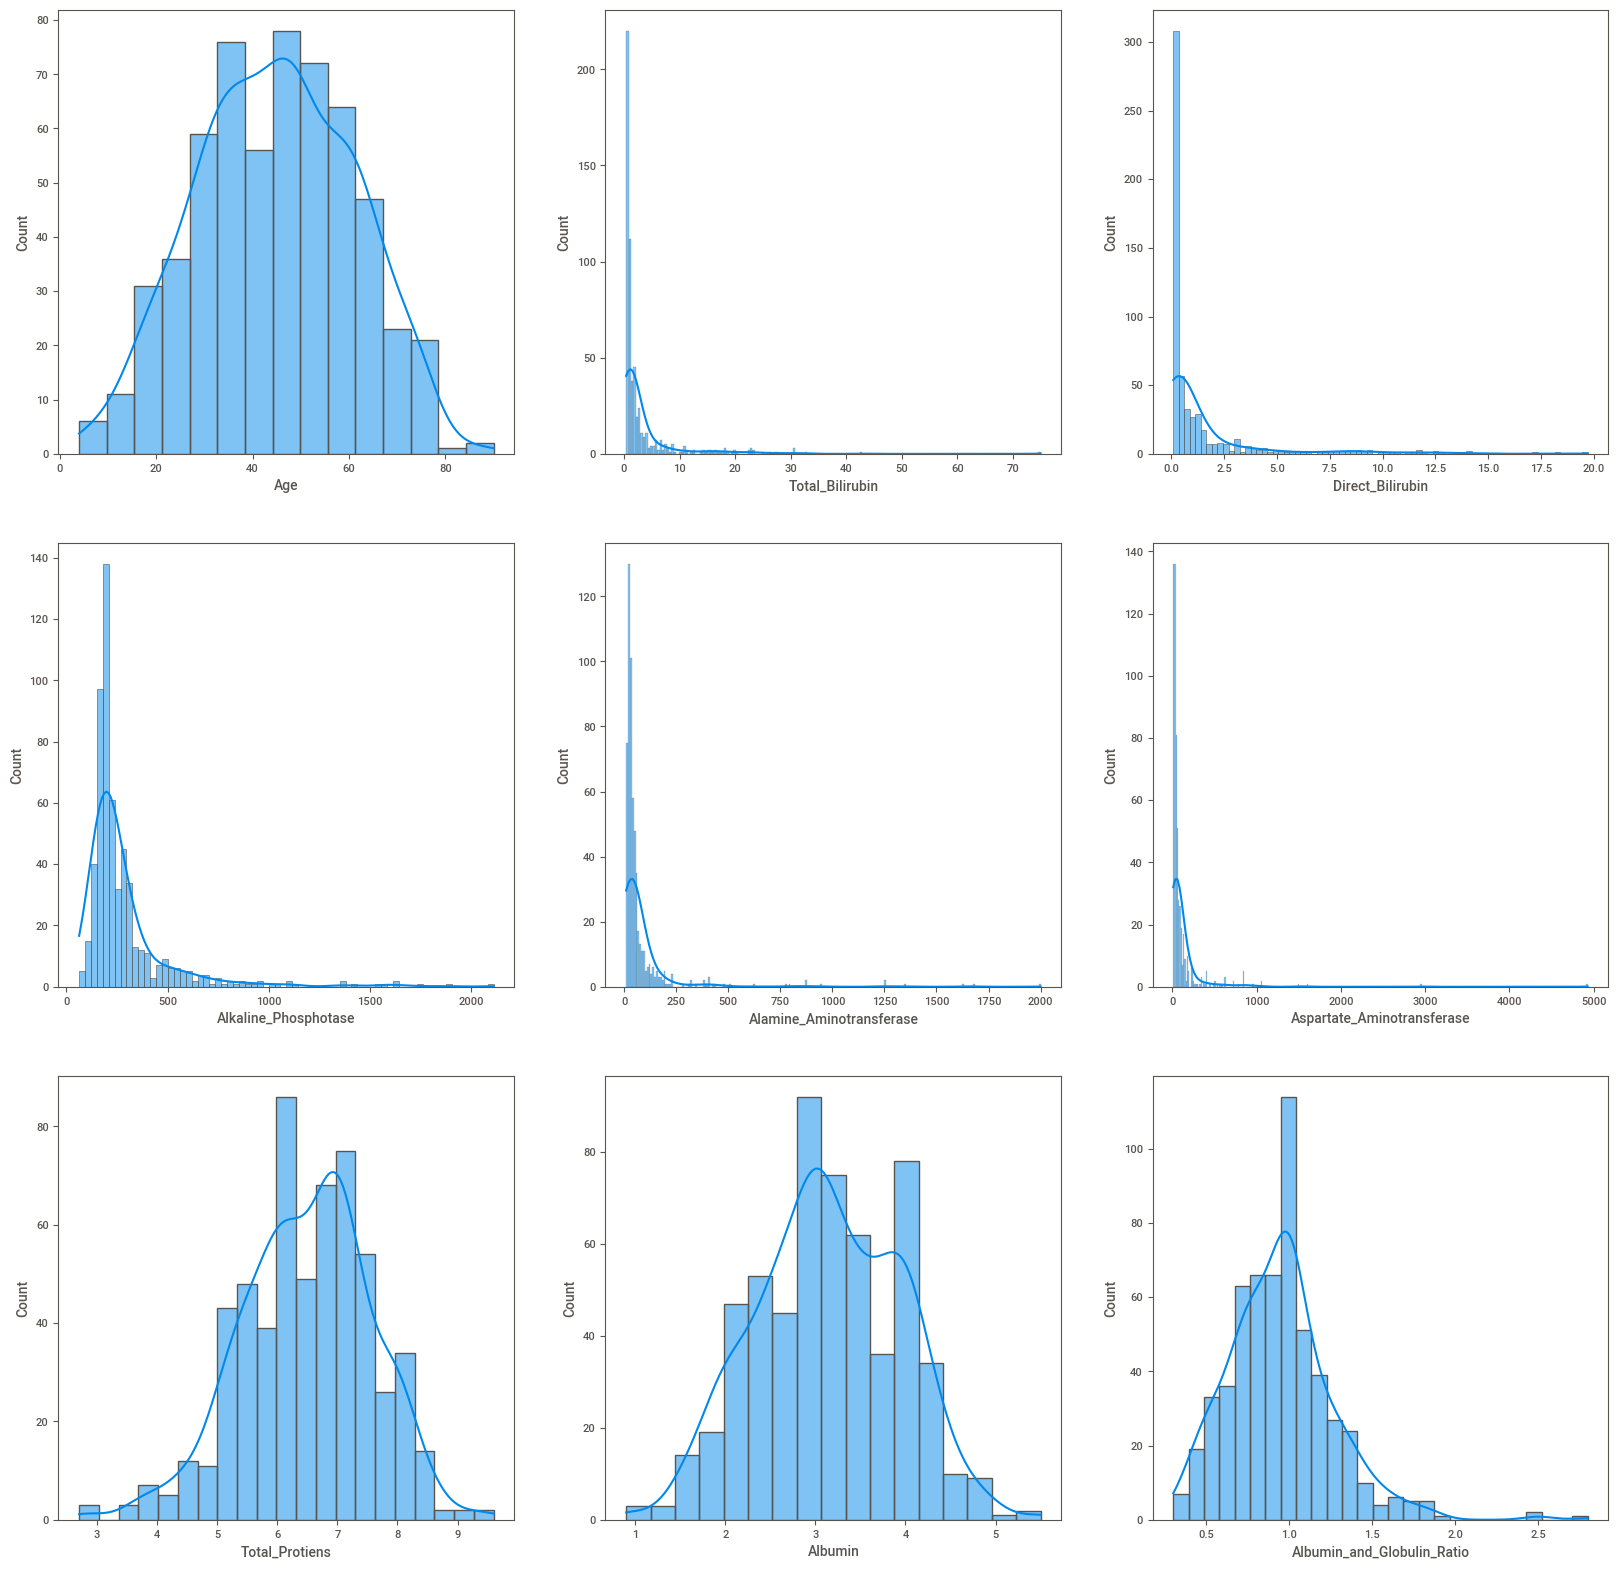

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in dfn:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=df[i],kde=True)
    plotnumber = plotnumber +  1
plt.tight_layout

#### Age
- The age distribution approximates normality with minor deviations.
- Ages above 89 are top-coded at 90.
- The mean age in the dataset is approximately 45 years.

#### Total Bilirubin
- Distribution is not normal; it is highly positively skewed (skewness = 4.91).
- Exhibits extreme leptokurtosis (kurtosis = 37.2), indicating a sharp peak and heavy tails.

#### Direct Bilirubin
- Not normally distributed; positively skewed (skewness = 3.21).
- Strongly leptokurtic (kurtosis = 11.2), suggesting concentrated values with heavy tails.

#### Alkaline Phosphatase
- Non-normal distribution with positive skewness (skewness = 3.77).
- Highly leptokurtic (kurtosis = 17.8), reflecting a pronounced peak and extended tails.

#### Alamine Aminotransferase
- Positively skewed (skewness = 6.55) and extremely leptokurtic (kurtosis = 50.6).
- Distribution is sharply peaked with significant tail weight.

#### Aspartate Aminotransferase
- Displays extreme positive skew (skewness = 10.5) due to high outliers.
- Exceptionally leptokurtic (kurtosis = 151), with a very sharp peak and heavy tails.

#### Total Proteins
- Distribution is close to normal with slight negative skew (skewness = -0.28).
- Mildly leptokurtic (kurtosis = 0.23).

#### Albumin
- Nearly normally distributed with negligible skewness (skewness = -0.04).
- Slightly platykurtic (kurtosis = -0.38), indicating a flatter distribution than normal.

#### Albumin and Globulin Ratio
- Moderately right-skewed (skewness = 0.99) and slightly leptokurtic (kurtosis = 3.28).
- Contains **4 missing values**.

<AxesSubplot:xlabel='Gender', ylabel='count'>

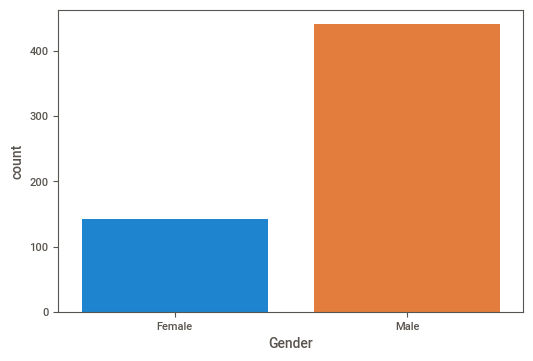

In [16]:
sns.countplot(x=df.Gender)

#### Gender
- This data set contains 441 male patient records which is approximately 76% and 142 female patient records which is about 24%

### ii. Bivarient Analysis

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

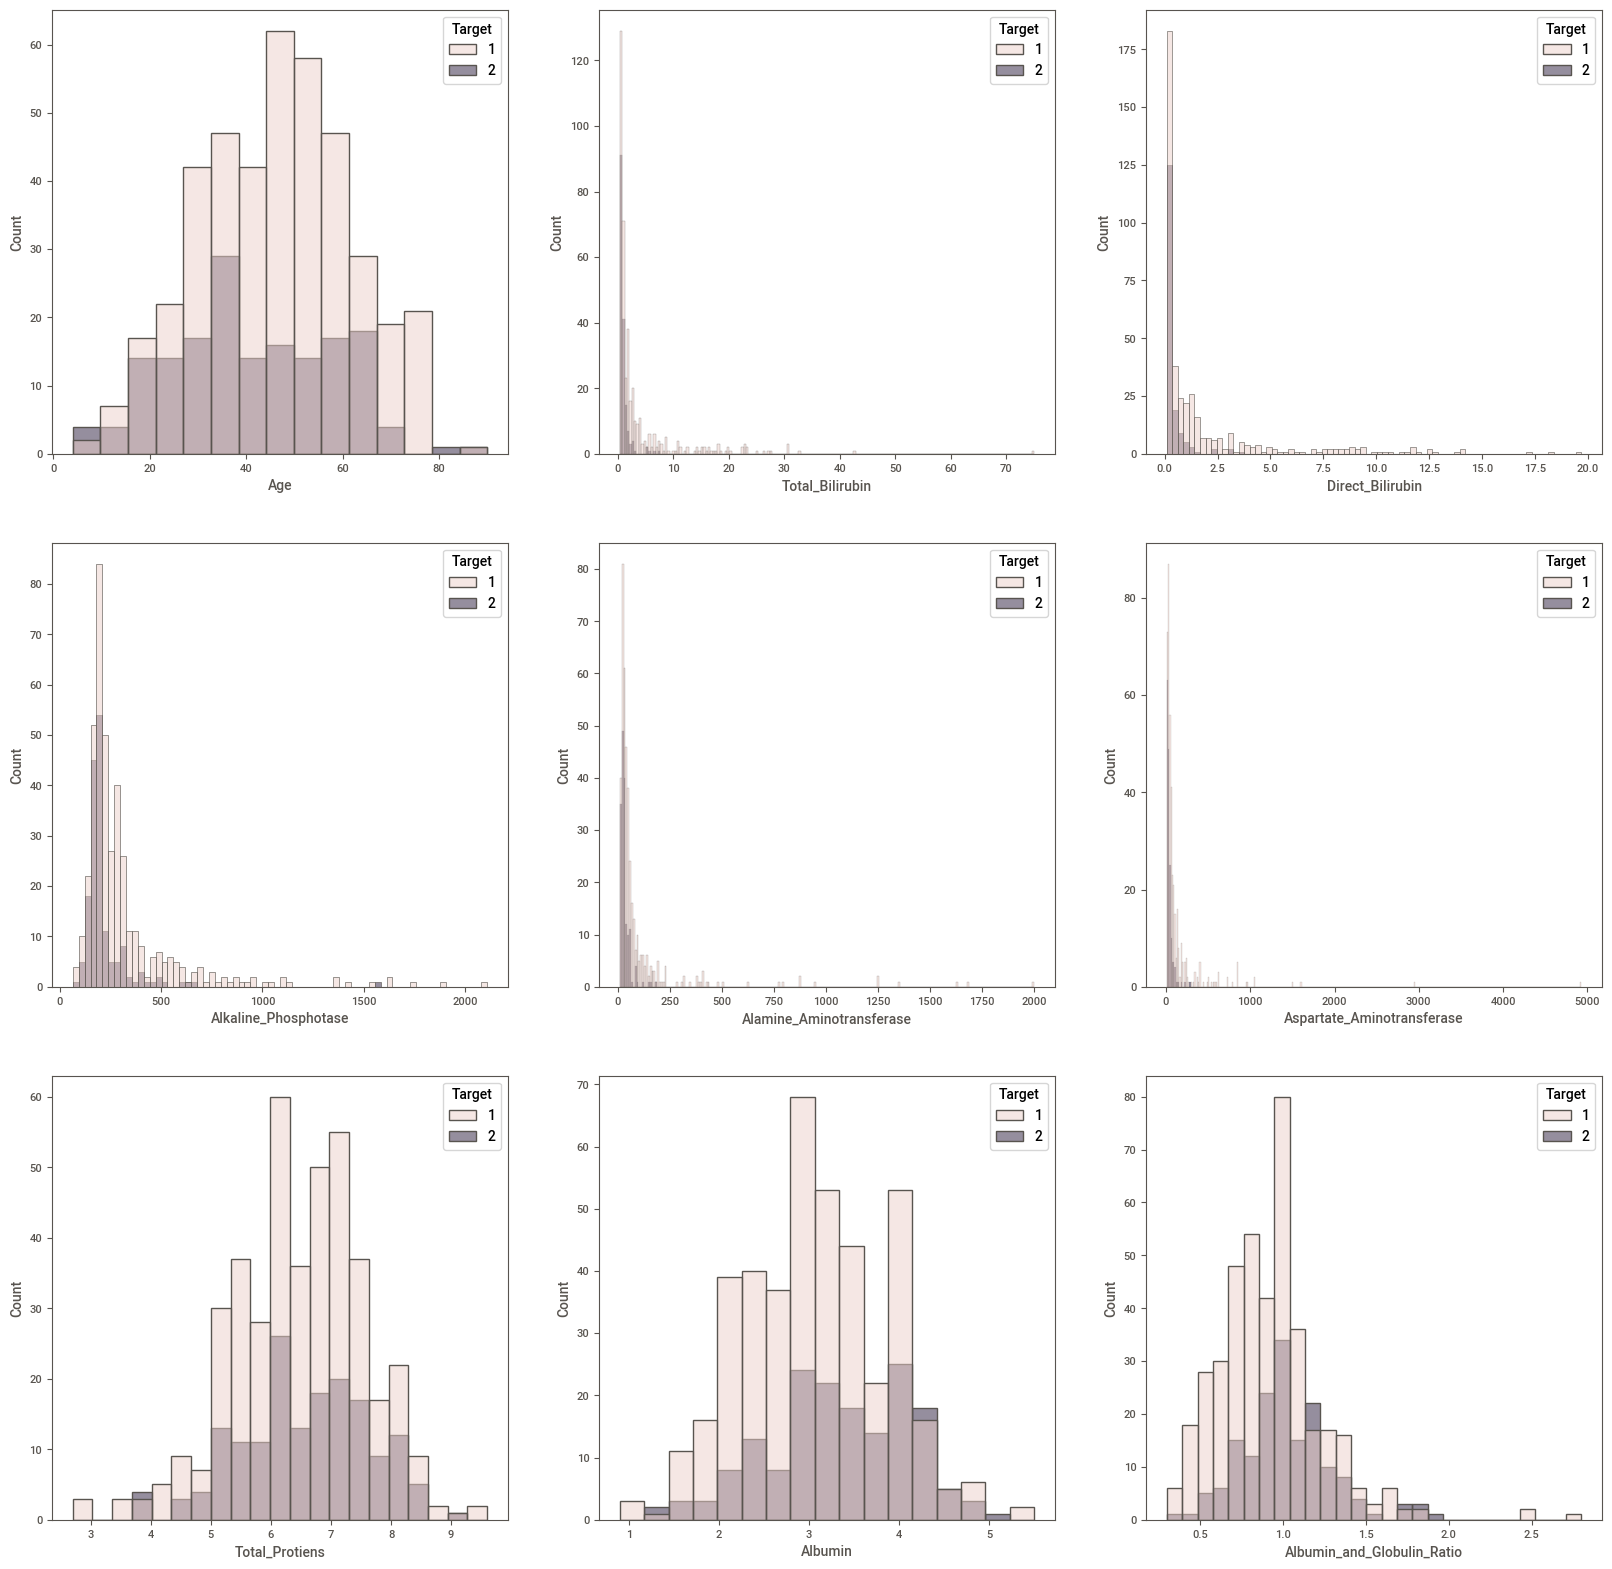

In [17]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in dfn:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=df[i], hue= df.Target)
    plotnumber = plotnumber +  1
plt.tight_layout

#### Age vs Target
- The incidence of liver disease increases notably after the age of 40.

#### Total Bilirubin vs Target
- Patients with total bilirubin levels greater than **1.2 mg/dL** are more likely to suffer from liver disease.

#### Direct Bilirubin vs Target
- Patients with direct bilirubin levels above **0.4 mg/dL** show a higher likelihood of liver disease.

#### Alkaline Phosphatase vs Target
- Alkaline Phosphatase levels exceeding **150 U/L** are associated with liver disease.

#### Alamine Aminotransferase vs Target
- Liver disease is more prevalent in patients with Alamine Aminotransferase levels above **60 U/L**.

#### Aspartate Aminotransferase vs Target
- Patients with Aspartate Aminotransferase levels above **50 U/L** tend to have liver disease.

#### Total Proteins vs Target
- An inverse relationship is observed; patients with Total Protein levels below **6 g/dL** are more likely to have liver disease.

#### Albumin vs Target
- Albumin levels show an inverse correlation with liver disease; values below **3 g/dL** are indicative of higher risk.

#### Albumin and Globulin Ratio vs Target
- A ratio below **1** is associated with increased incidence of liver disease.

In [18]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

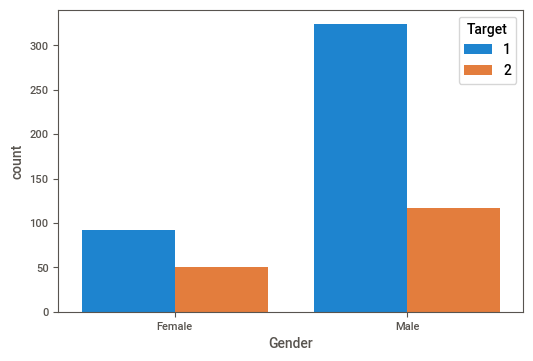

In [19]:
sns.countplot(x=df.Gender, hue = df.Target)

# 4. Data Preprocessing

In [20]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

### i. Handelling Null Values

In [21]:
df.loc[df.Albumin_and_Globulin_Ratio.isnull(),'Albumin_and_Globulin_Ratio']

209   NaN
241   NaN
253   NaN
312   NaN
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [22]:
np.mean(df.Albumin_and_Globulin_Ratio.dropna())

0.9470639032815201

In [23]:
df.loc[df.Albumin_and_Globulin_Ratio.isnull(),'Albumin_and_Globulin_Ratio'] = np.mean(df.Albumin_and_Globulin_Ratio.dropna())

In [24]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

### ii. Duplicate Values

In [25]:
df.duplicated().sum()

13

In [26]:
df.loc[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [27]:
df.shape

(583, 11)

In [28]:
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [29]:
df.shape

(583, 11)

In [30]:
df = df.drop_duplicates()

In [31]:
df.shape

(570, 11)

### iii. Outliers

In [32]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

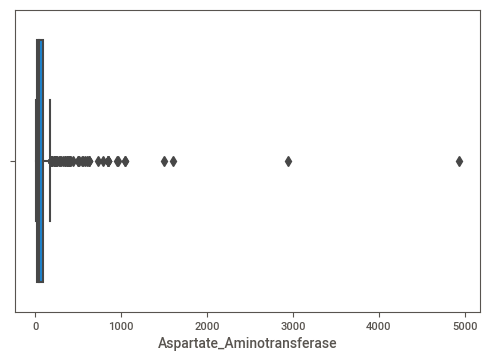

In [33]:
sns.boxplot(x=df.Aspartate_Aminotransferase)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

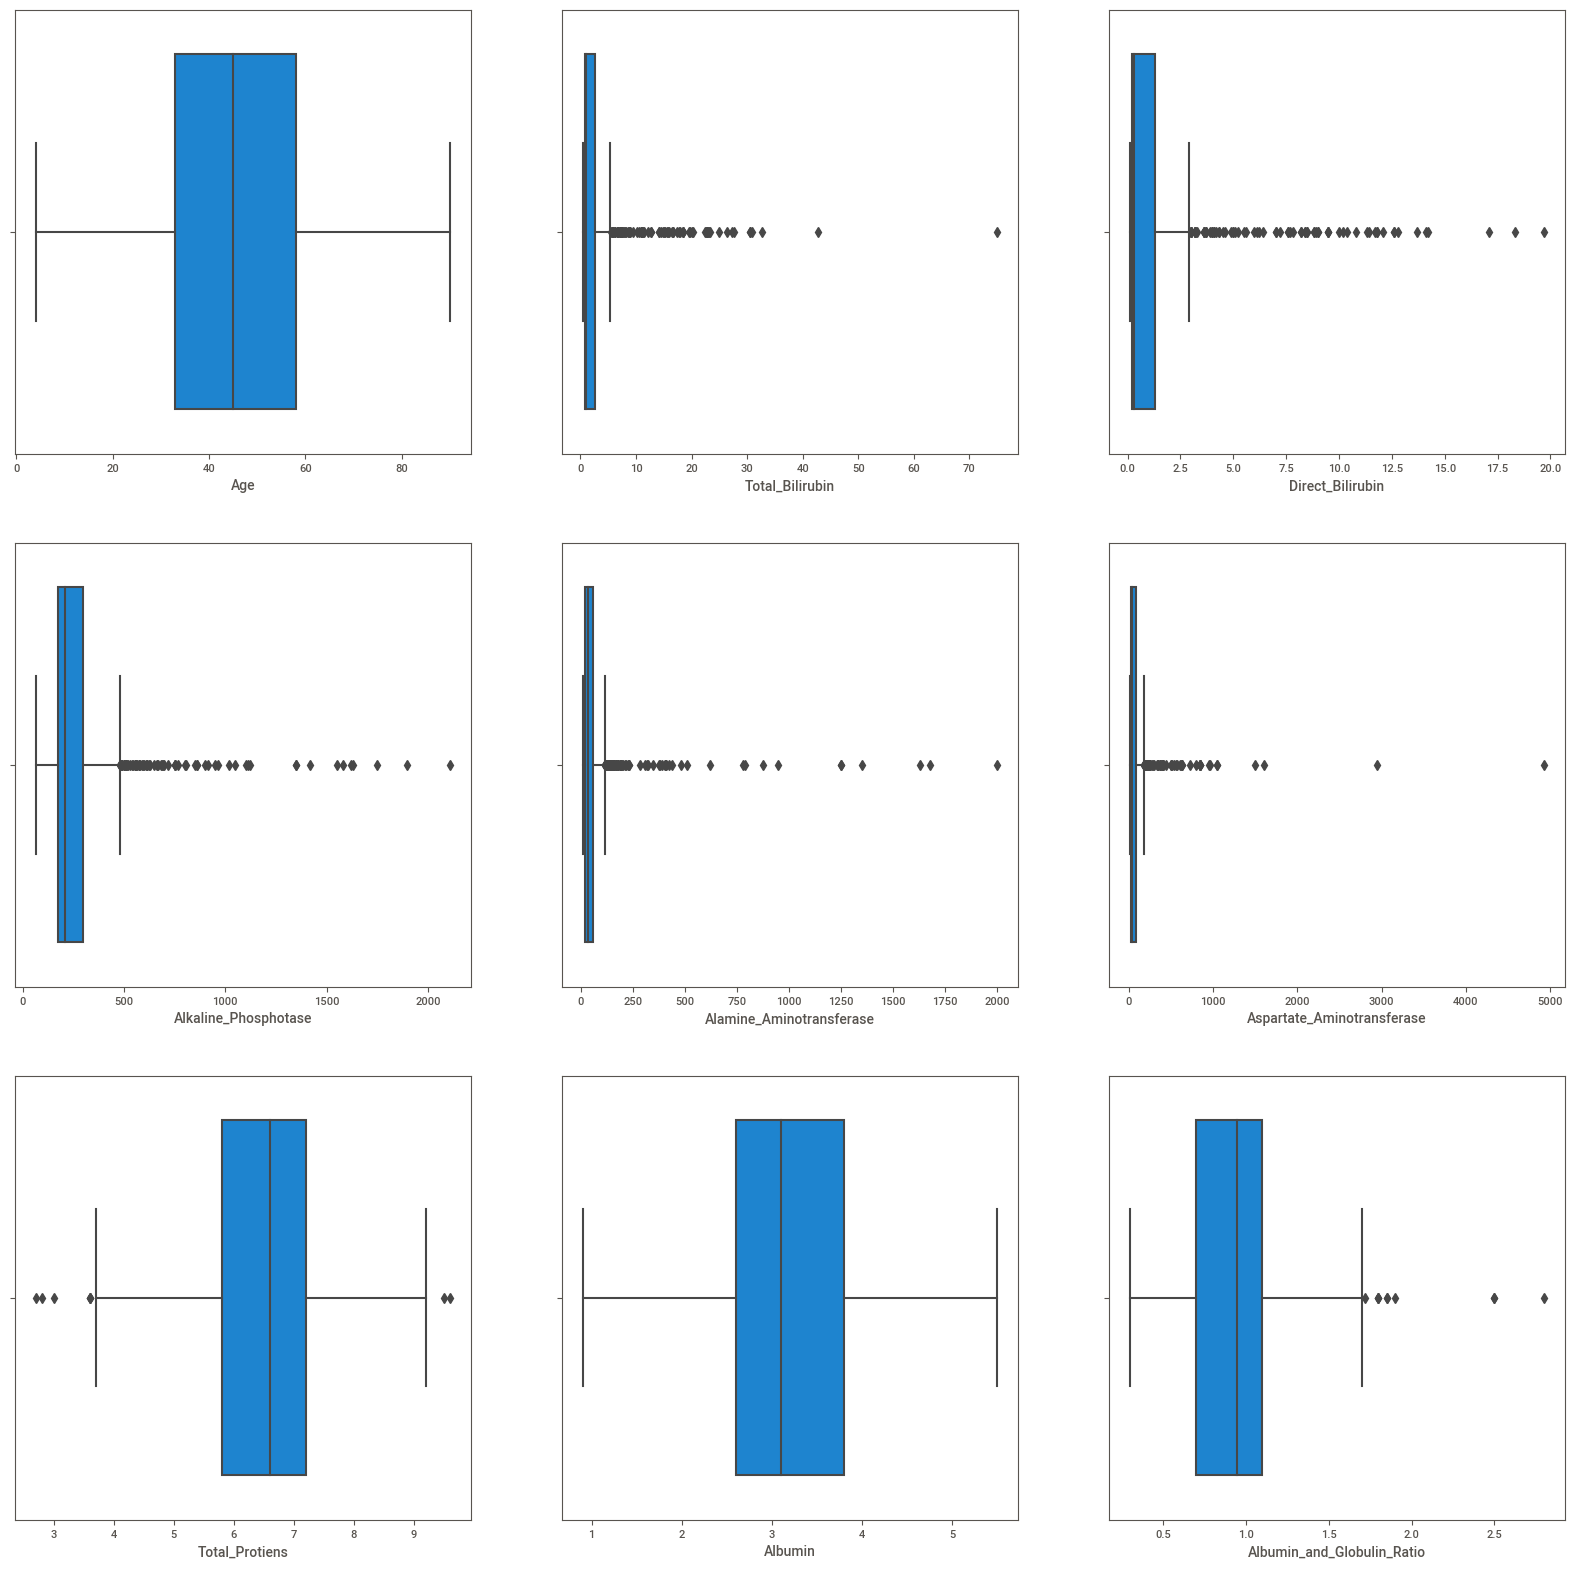

In [34]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in dfn:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df[i])
    plotnumber = plotnumber +  1
plt.tight_layout

In [35]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [36]:
df.loc[df.Aspartate_Aminotransferase>=2000,'Aspartate_Aminotransferase']

117    2946
135    4929
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
df.loc[df.Aspartate_Aminotransferase>=2000,'Aspartate_Aminotransferase'] = np.median(df.Aspartate_Aminotransferase)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

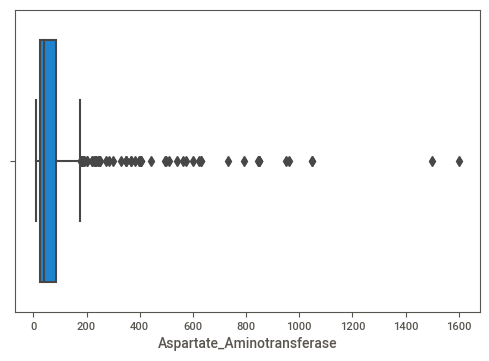

In [38]:
sns.boxplot(x=df.Aspartate_Aminotransferase)

In [39]:
df.loc[df['Total_Bilirubin']>70,'Total_Bilirubin']=np.mean(df.Total_Bilirubin)
df.loc[df['Direct_Bilirubin']>15.0,'Direct_Bilirubin']=np.mean(df.Direct_Bilirubin)
df.loc[df['Alkaline_Phosphotase']>1500,'Alkaline_Phosphotase']=np.median(df.Alkaline_Phosphotase)
df.loc[df['Alamine_Aminotransferase']>1500.00,'Alamine_Aminotransferase']=np.median(df.Alamine_Aminotransferase)

In [40]:
Q3 = df.Total_Protiens.quantile(0.75)
Q1 = df.Total_Protiens.quantile(0.25)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

df.loc[df['Total_Protiens']>UL,'Total_Protiens']=np.mean(df.Total_Protiens)
df.loc[df['Total_Protiens']<LL,'Total_Protiens']=np.mean(df.Total_Protiens)

In [41]:
df.loc[df['Albumin_and_Globulin_Ratio']>2.0,'Albumin_and_Globulin_Ratio']=np.mean(df.Albumin_and_Globulin_Ratio)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

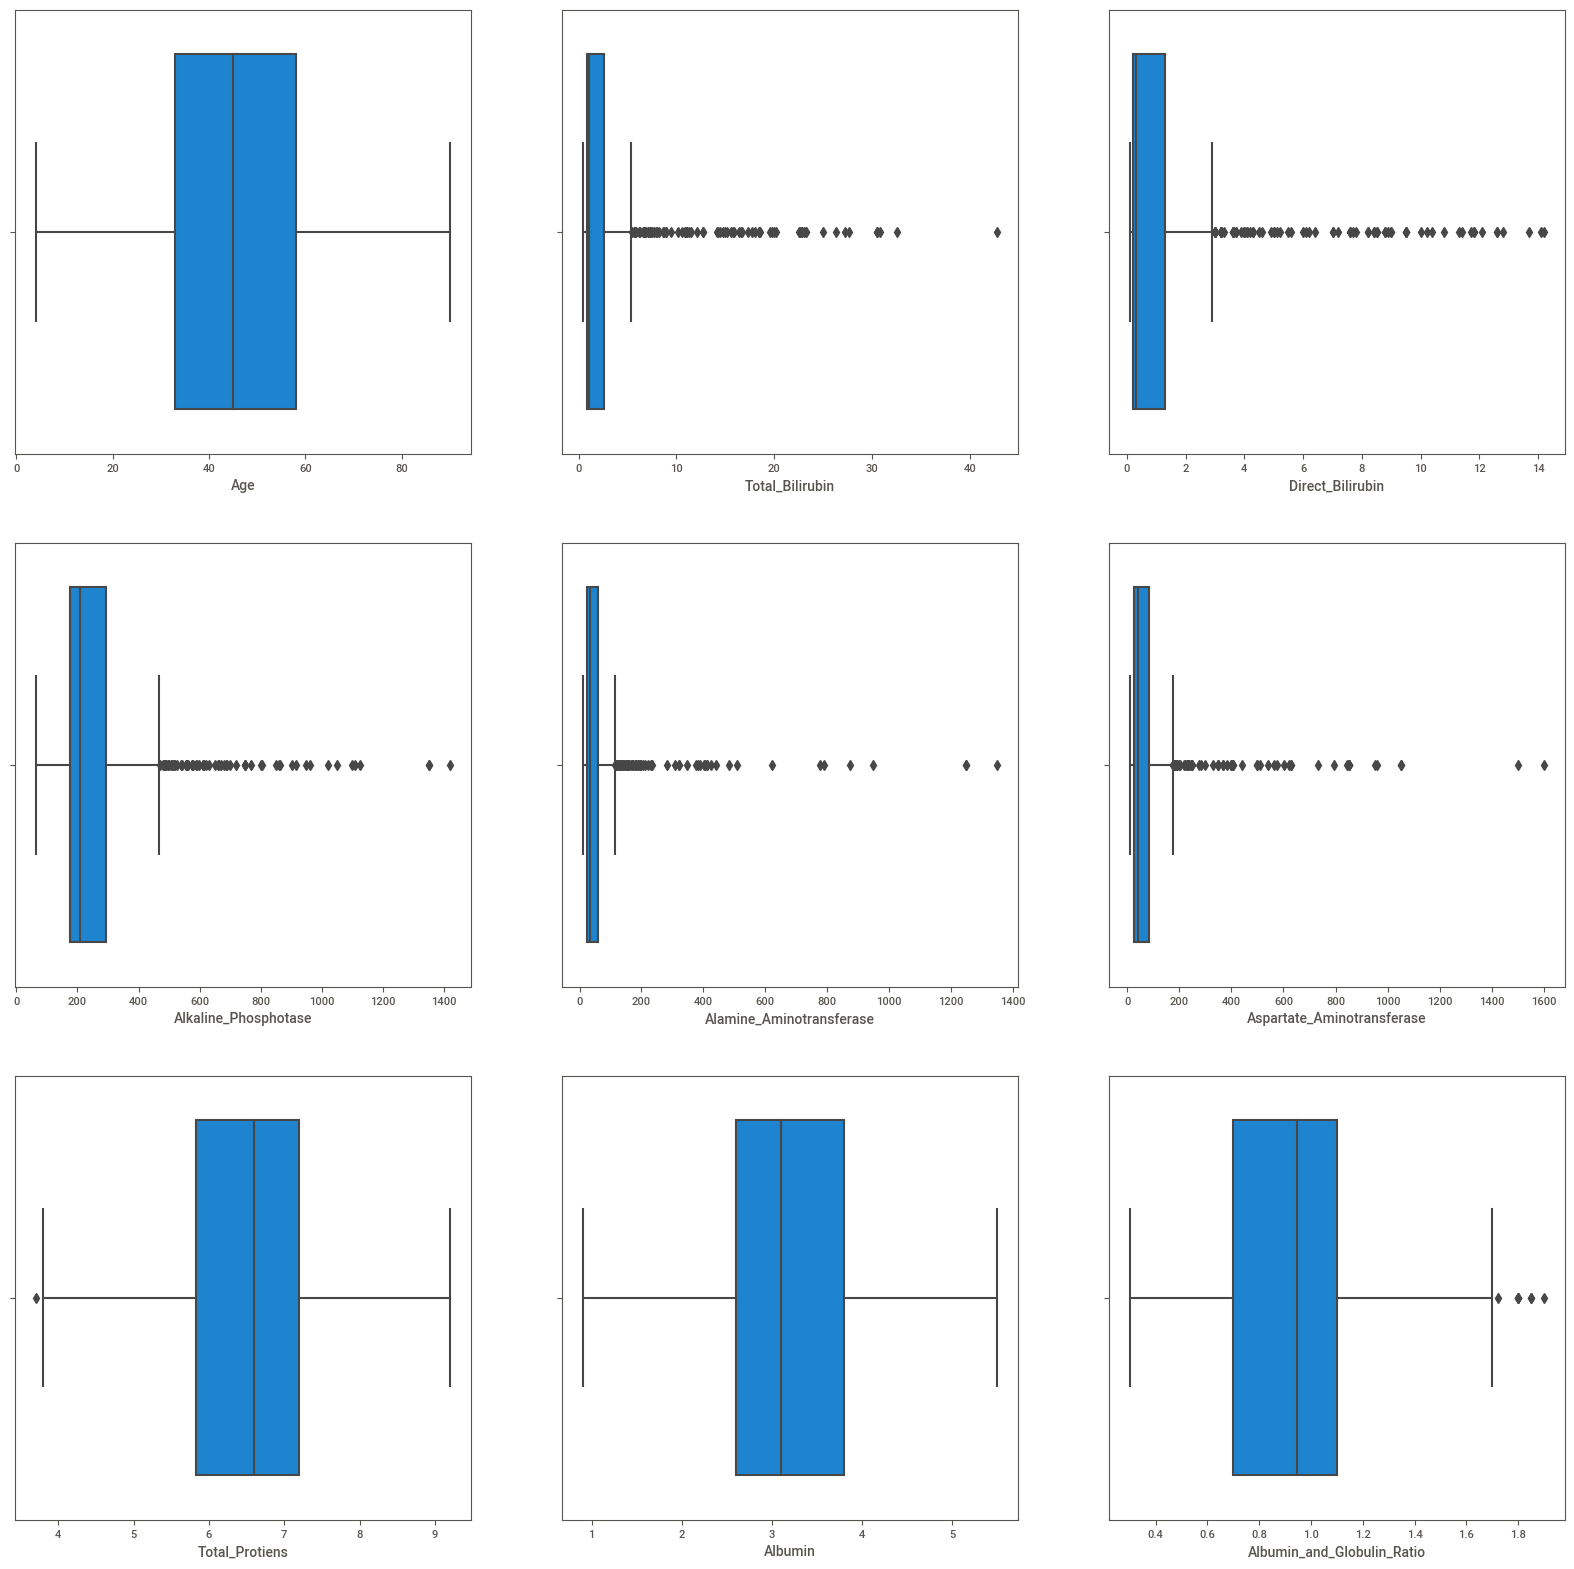

In [42]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in dfn:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df[i])
    plotnumber = plotnumber +  1
plt.tight_layout

### iv. Finding Correlation

<AxesSubplot:>

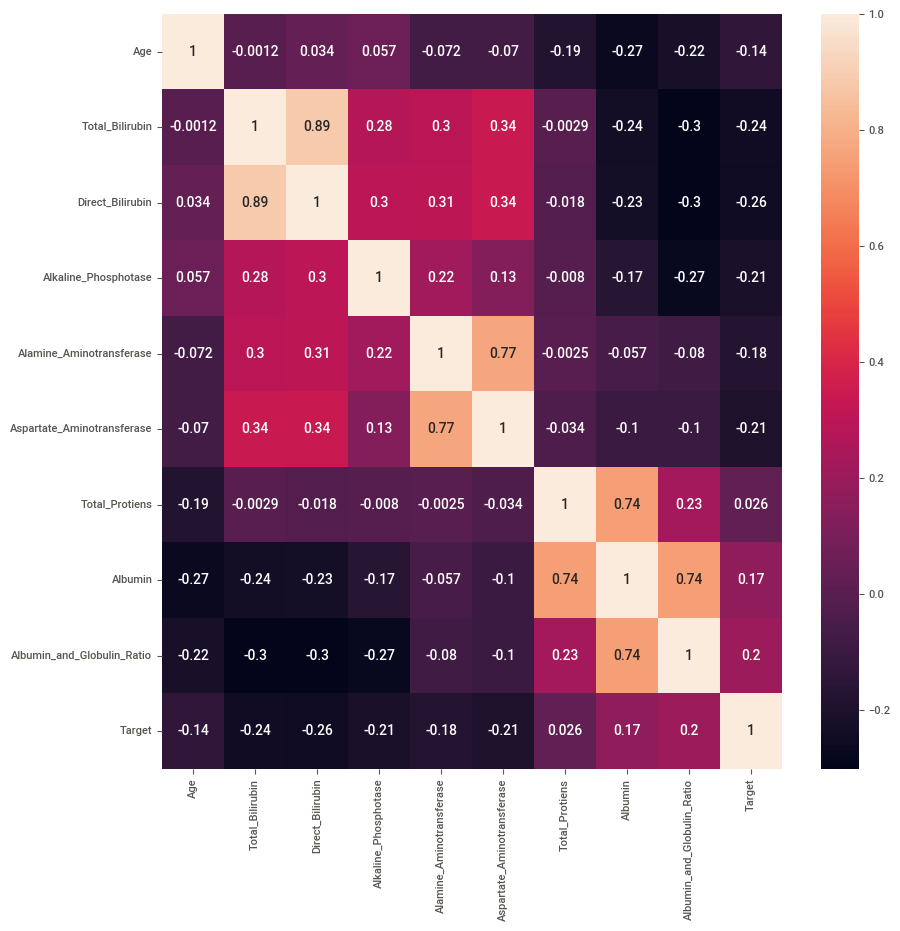

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### v. Encoding

In [44]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [45]:
df.loc[df.Gender=='Male','Gender'] = 0

In [46]:
df.loc[df.Gender=='Female','Gender'] = 1

In [47]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Target                      570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [49]:
df.Gender = df.Gender.astype('int64') #changing data type from object to integer

C:\Users\temp0\AppData\Local\Temp\ipykernel_20032\1250526630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender = df.Gender.astype('int64')


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int64  
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Target                      570 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.4 KB


In [51]:
df.loc[df.Target==2,'Target'] = 0

In [52]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int64  
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Target                      570 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.4 KB


### vi. Scaling

In [54]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [55]:
dfn

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
ms = MinMaxScaler()

In [58]:
dfOG = df

In [59]:
for i in dfn:
    df[i] = ms.fit_transform(df[[i]])


C:\Users\temp0\AppData\Local\Temp\ipykernel_20032\804705828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = ms.fit_transform(df[[i]])
C:\Users\temp0\AppData\Local\Temp\ipykernel_20032\804705828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = ms.fit_transform(df[[i]])
C:\Users\temp0\AppData\Local\Temp\ipykernel_20032\804705828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [60]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,0.709302,1,0.007075,0.000000,0.091378,0.004478,0.005031,0.563636,0.521739,0.37500,1
1,0.674419,0,0.247642,0.382979,0.468681,0.040299,0.056604,0.690909,0.500000,0.27500,1
2,0.674419,0,0.162736,0.283688,0.314665,0.037313,0.036478,0.600000,0.521739,0.36875,1
3,0.627907,0,0.014151,0.021277,0.087693,0.002985,0.006289,0.563636,0.543478,0.43750,1
4,0.790698,0,0.082547,0.134752,0.097273,0.012687,0.030818,0.654545,0.326087,0.06250,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,0,0.002358,0.000000,0.322034,0.007463,0.015094,0.400000,0.152174,0.04375,0
579,0.418605,0,0.004717,0.000000,0.025792,0.018657,0.013208,0.418182,0.500000,0.50000,1
580,0.558140,0,0.009434,0.007092,0.134119,0.028358,0.024528,0.490909,0.500000,0.43750,1
581,0.313953,0,0.021226,0.028369,0.089167,0.014179,0.013836,0.563636,0.543478,0.43750,1


### vii. Balancing

In [65]:
df.shape

(570, 11)

In [66]:
df.Target.value_counts()

1    406
0    164
Name: Target, dtype: int64

In [70]:
from sklearn.utils.class_weight import compute_sample_weight

In [71]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y)

# 5. Model Building and Evaluation

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = df.drop('Target',axis=1)
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,1,0.007075,0.000000,0.091378,0.004478,0.005031,0.563636,0.521739,0.37500
1,0.674419,0,0.247642,0.382979,0.468681,0.040299,0.056604,0.690909,0.500000,0.27500
2,0.674419,0,0.162736,0.283688,0.314665,0.037313,0.036478,0.600000,0.521739,0.36875
3,0.627907,0,0.014151,0.021277,0.087693,0.002985,0.006289,0.563636,0.543478,0.43750
4,0.790698,0,0.082547,0.134752,0.097273,0.012687,0.030818,0.654545,0.326087,0.06250
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,0,0.002358,0.000000,0.322034,0.007463,0.015094,0.400000,0.152174,0.04375
579,0.418605,0,0.004717,0.000000,0.025792,0.018657,0.013208,0.418182,0.500000,0.50000
580,0.558140,0,0.009434,0.007092,0.134119,0.028358,0.024528,0.490909,0.500000,0.43750
581,0.313953,0,0.021226,0.028369,0.089167,0.014179,0.013836,0.563636,0.543478,0.43750


In [63]:
y = df.Target

In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Target, Length: 570, dtype: int64

In [72]:
x_train,x_test,y_train,y_test,w_train, w_test = train_test_split(x,y, sample_weights,test_size=0.25,random_state=42)

## i. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
LR = LogisticRegression()

In [75]:
LR.fit(x_train,y_train, sample_weight=w_train)

LogisticRegression()

In [76]:
y_pred_LR = LR.predict(x_test)
y_pred_LR

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [78]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        40
           1       0.89      0.60      0.72       103

    accuracy                           0.66       143
   macro avg       0.66      0.70      0.64       143
weighted avg       0.76      0.66      0.67       143



In [79]:
pd.crosstab(y_test,y_pred_LR)

col_0,0,1
Target,,
0,32,8
1,41,62


In [80]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_LR))
print('Precision Score:',precision_score(y_test,y_pred_LR))
print('Recall Score:',recall_score(y_test,y_pred_LR))
print('F1 Score:',f1_score(y_test,y_pred_LR))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_LR))

Accuracy Score: 0.6573426573426573
Precision Score: 0.8857142857142857
Recall Score: 0.6019417475728155
F1 Score: 0.7167630057803468
ROC-AUC Score: 0.7009708737864078


## ii. SVM

In [81]:
from sklearn.svm import SVC
sv = SVC()

In [82]:
sv.fit(x_train,y_train,sample_weight=w_train)

SVC()

In [83]:
y_pred_SV = sv.predict(x_test)
y_pred_SV

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred_SV))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_SV))
print('Precision Score:',precision_score(y_test,y_pred_SV))
print('Recall Score:',recall_score(y_test,y_pred_SV))
print('F1 Score:',f1_score(y_test,y_pred_SV))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_SV))

              precision    recall  f1-score   support

           0       0.41      0.88      0.56        40
           1       0.91      0.50      0.65       103

    accuracy                           0.61       143
   macro avg       0.66      0.69      0.60       143
weighted avg       0.77      0.61      0.62       143

---------------------------------------------------------------
Accuracy Score: 0.6083916083916084
Precision Score: 0.9122807017543859
Recall Score: 0.5048543689320388
F1 Score: 0.65
ROC-AUC Score: 0.6899271844660194


In [85]:
pd.crosstab(y_test,y_pred_SV)

col_0,0,1
Target,,
0,35,5
1,51,52


## iii. Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [87]:
dt.fit(x_train, y_train,sample_weight=w_train)

DecisionTreeClassifier()

In [88]:
y_pred_DT = dt.predict(x_test)
y_pred_DT

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred_DT))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_DT))
print('Precision Score:',precision_score(y_test,y_pred_DT))
print('Recall Score:',recall_score(y_test,y_pred_DT))
print('F1 Score:',f1_score(y_test,y_pred_DT))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.29      0.28      0.28        40
           1       0.72      0.74      0.73       103

    accuracy                           0.61       143
   macro avg       0.51      0.51      0.51       143
weighted avg       0.60      0.61      0.61       143

---------------------------------------------------------------
Accuracy Score: 0.6083916083916084
Precision Score: 0.7238095238095238
Recall Score: 0.7378640776699029
F1 Score: 0.7307692307692307
ROC-AUC Score: 0.5064320388349515


In [90]:
pd.crosstab(y_test,y_pred_DT)

col_0,0,1
Target,,
0,11,29
1,27,76


## iv. Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=111)

In [92]:
rf.fit(x_train, y_train,sample_weight=w_train)

RandomForestClassifier(random_state=111)

In [93]:
y_pred_RF = rf.predict(x_test)           
y_pred_RF

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred_RF))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_RF))
print('Precision Score:',precision_score(y_test,y_pred_RF))
print('Recall Score:',recall_score(y_test,y_pred_RF))
print('F1 Score:',f1_score(y_test,y_pred_RF))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.58      0.38      0.45        40
           1       0.79      0.89      0.84       103

    accuracy                           0.75       143
   macro avg       0.68      0.63      0.65       143
weighted avg       0.73      0.75      0.73       143

---------------------------------------------------------------
Accuracy Score: 0.7482517482517482
Precision Score: 0.7863247863247863
Recall Score: 0.8932038834951457
F1 Score: 0.8363636363636364
ROC-AUC Score: 0.6341019417475728


In [95]:
pd.crosstab(y_test,y_pred_RF)

col_0,0,1
Target,,
0,15,25
1,11,92


## v. Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier 
gbm=GradientBoostingClassifier()

In [97]:
gbm.fit(x_train,y_train,sample_weight=w_train)

GradientBoostingClassifier()

In [98]:
y_pred_GB = gbm.predict(x_test)
y_pred_GB

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred_GB))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_GB))
print('Precision Score:',precision_score(y_test,y_pred_GB))
print('Recall Score:',recall_score(y_test,y_pred_GB))
print('F1 Score:',f1_score(y_test,y_pred_GB))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.41      0.57      0.48        40
           1       0.80      0.68      0.74       103

    accuracy                           0.65       143
   macro avg       0.61      0.63      0.61       143
weighted avg       0.69      0.65      0.66       143

---------------------------------------------------------------
Accuracy Score: 0.6503496503496503
Precision Score: 0.8045977011494253
Recall Score: 0.6796116504854369
F1 Score: 0.736842105263158
ROC-AUC Score: 0.6273058252427184


In [100]:
pd.crosstab(y_test,y_pred_GB)

col_0,0,1
Target,,
0,23,17
1,33,70


## vi. XGBoosting

In [101]:
from xgboost import XGBClassifier
xgb=XGBClassifier() 

In [102]:
xgb.fit(x_train,y_train,sample_weight=w_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred_XGB = xgb.predict(x_test)
y_pred_XGB

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [104]:
print(classification_report(y_test,y_pred_XGB))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_XGB))
print('Precision Score:',precision_score(y_test,y_pred_XGB))
print('Recall Score:',recall_score(y_test,y_pred_XGB))
print('F1 Score:',f1_score(y_test,y_pred_XGB))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.39      0.38      0.38        40
           1       0.76      0.78      0.77       103

    accuracy                           0.66       143
   macro avg       0.58      0.58      0.58       143
weighted avg       0.66      0.66      0.66       143

---------------------------------------------------------------
Accuracy Score: 0.6643356643356644
Precision Score: 0.7619047619047619
Recall Score: 0.7766990291262136
F1 Score: 0.7692307692307692
ROC-AUC Score: 0.5758495145631068


In [105]:
pd.crosstab(y_test,y_pred_XGB)

col_0,0,1
Target,,
0,15,25
1,23,80


# 6. Model Comparison Report

In [106]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=111),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
}

**i. Accuracy Score**

In [107]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train,sample_weight=w_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.6573

SVM (Linear) Accuracy: 0.6084

Decision Tree Accuracy: 0.6224

Random Forest Accuracy: 0.7483

Gradient Boosting Accuracy: 0.6503

XGBoost Accuracy: 0.6643


**ii. Precesion and Recall Score**

In [108]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train,sample_weight=w_train)
    y_pred = model.predict(x_test)
    Pre = precision_score(y_test, y_pred)
    model_results[name] = Pre
    Recall = recall_score(y_test, y_pred)
    model_results[name] = Recall
    print(f"\n{name} \n Precesion: {Pre:.4f} Recall: {Recall:.4f}")   


Logistic Regression 
 Precesion: 0.8857 Recall: 0.6019

SVM (Linear) 
 Precesion: 0.9123 Recall: 0.5049

Decision Tree 
 Precesion: 0.7255 Recall: 0.7184

Random Forest 
 Precesion: 0.7863 Recall: 0.8932

Gradient Boosting 
 Precesion: 0.8046 Recall: 0.6796

XGBoost 
 Precesion: 0.7619 Recall: 0.7767


### iii. Comparision Report 

Several classification models were applied to the given dataset, including Decision Tree, Logistic Regression, Support Vector Machine (SVM), Random Forest, Gradient Boosting, and XGBoost.
Among these, Random Forest, Gradient Boosting, and XGBoost demonstrated comparatively better performance.
Consequently, hyperparameter tuning was conducted on these models to further enhance their accuracy scores.

## ---------------------------------------------------------------------------------------------------------

## 7. Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [110]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

### i. Random Forest

In [111]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [112]:
#RandomizedSearch CV

In [113]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [114]:
rfc = RandomForestClassifier()

In [115]:
rscv = RandomizedSearchCV(estimator=rfc, scoring='recall', param_distributions=random_grid, n_iter=100, cv=5, 
                               verbose=3, random_state=42, n_jobs=-1)

In [116]:
rscv.fit(x_train, y_train,sample_weight=w_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, scoring='recall', verbose=3)

In [117]:
rscv.best_params_

{'n_estimators': 944,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

In [118]:
rf2 = RandomForestClassifier(n_estimators = 1366,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'log2',
 max_depth = 40,
 bootstrap = True, random_state=111)

In [119]:
rf2.fit(x_train, y_train,sample_weight=w_train)

RandomForestClassifier(max_depth=40, max_features='log2', n_estimators=1366,
                       random_state=111)

In [120]:
y_pred_RF1 = rf2.predict(x_test)           
y_pred_RF1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [121]:
print(classification_report(y_test,y_pred_RF1))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_RF1))
print('Precision Score:',precision_score(y_test,y_pred_RF1))
print('Recall Score:',recall_score(y_test,y_pred_RF1))
print('F1 Score:',f1_score(y_test,y_pred_RF1))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_RF1))

              precision    recall  f1-score   support

           0       0.61      0.35      0.44        40
           1       0.78      0.91      0.84       103

    accuracy                           0.76       143
   macro avg       0.70      0.63      0.64       143
weighted avg       0.73      0.76      0.73       143

---------------------------------------------------------------
Accuracy Score: 0.7552447552447552
Precision Score: 0.7833333333333333
Recall Score: 0.912621359223301
F1 Score: 0.8430493273542601
ROC-AUC Score: 0.6313106796116505


### ii. Gradient Boosting

In [132]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100],
}

In [133]:
GB=GradientBoostingClassifier() 

In [134]:
GCV= GridSearchCV(estimator=GB, scoring='recall',refit = True,param_grid=param_grid, cv=5,
                               verbose=2, n_jobs=-1)

In [135]:
GCV.fit(x_train,y_train,sample_weight=w_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6,
                                           0.7],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 65, 80, 100]},
             scoring='recall', verbose=2)

In [136]:
GCV.best_params_

{'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 50}

In [137]:
gbm1=GradientBoostingClassifier(learning_rate = 0.5, max_depth = 8, n_estimators = 65)


In [138]:
gbm1.fit(x_train,y_train,sample_weight=w_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=8, n_estimators=65)

In [139]:
y_pred_GB1 = gbm1.predict(x_test)
y_pred_GB1

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [140]:
print(classification_report(y_test,y_pred_GB1))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_GB1))
print('Precision Score:',precision_score(y_test,y_pred_GB1))
print('Recall Score:',recall_score(y_test,y_pred_GB1))
print('F1 Score:',f1_score(y_test,y_pred_GB1))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_GB1))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        40
           1       0.77      0.86      0.82       103

    accuracy                           0.72       143
   macro avg       0.64      0.61      0.61       143
weighted avg       0.70      0.72      0.70       143

---------------------------------------------------------------
Accuracy Score: 0.7202797202797203
Precision Score: 0.7739130434782608
Recall Score: 0.8640776699029126
F1 Score: 0.8165137614678899
ROC-AUC Score: 0.6070388349514564


### iii. XGBoosting

In [141]:
param_gridXGB = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [142]:
XGB = XGBClassifier()
rcv1= RandomizedSearchCV(estimator=XGB, scoring='recall',param_distributions=param_gridXGB, n_iter=100, cv=5, 
                               verbose=4, random_state=42, n_jobs=-1)

In [143]:
rcv1.fit(x_train, y_train,sample_weight=w_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06,

In [144]:
rcv1.best_params_

{'reg_lambda': 0.2,
 'reg_alpha': 0.4,
 'n_estimators': 115,
 'max_depth': 12,
 'learning_rate': 0.2,
 'gamma': 0}

In [145]:
XGB1=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators= 115, max_depth= 12, learning_rate= 0.2, gamma= 0) 

In [146]:
XGB1.fit(x_train, y_train,sample_weight=w_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=115, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
y_pred_XGB1 = XGB1.predict(x_test)
y_pred_XGB1

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [148]:
print(classification_report(y_test,y_pred_XGB1))
print("---------------------------------------------------------------")
print('Accuracy Score:',accuracy_score(y_test,y_pred_XGB1))
print('Precision Score:',precision_score(y_test,y_pred_XGB1))
print('Recall Score:',recall_score(y_test,y_pred_XGB1))
print('F1 Score:',f1_score(y_test,y_pred_XGB1))
print('ROC-AUC Score:',roc_auc_score(y_test,y_pred_XGB1))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        40
           1       0.76      0.77      0.76       103

    accuracy                           0.66       143
   macro avg       0.57      0.57      0.57       143
weighted avg       0.65      0.66      0.66       143

---------------------------------------------------------------
Accuracy Score: 0.6573426573426573
Precision Score: 0.7596153846153846
Recall Score: 0.7669902912621359
F1 Score: 0.7632850241545893
ROC-AUC Score: 0.570995145631068


### Model Comparision After Hyperparameter Tuning

To identify the most suitable classification model for the given dataset, three ensemble learning algorithms were evaluated: Random Forest, Gradient Boosting, and XGBoost. Each model was assessed based on its accuracy, precision, and recall scores.


In [149]:
models = {
    
    "Random Forest": RandomForestClassifier(n_estimators = 1366,min_samples_split = 2,min_samples_leaf = 1,max_features = 'log2',max_depth = 40, bootstrap = True, random_state=111),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate = 0.5, max_depth = 8, n_estimators = 65),
    "XGBoost": XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators= 115, max_depth= 12, learning_rate= 0.2, gamma= 0),
}

In [150]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train,sample_weight=w_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"\n \033[1m{name}\033[0m")
    Pre = precision_score(y_test, y_pred)
    model_results[name] = Pre
    Recall = recall_score(y_test, y_pred)
    model_results[name] = Recall
    print(f" \n Accuracy: {accuracy:.4f} Precesion: {Pre:.4f} Recall: {Recall:.4f}")


 Random Forest
 
 Accuracy: 0.7552 Precesion: 0.7833 Recall: 0.9126

 Gradient Boosting
 
 Accuracy: 0.7273 Precesion: 0.7759 Recall: 0.8738

 XGBoost
 
 Accuracy: 0.6573 Precesion: 0.7596 Recall: 0.7670


# 8. Conclusion

Random Forest demonstrated the highest accuracy and recall among all evaluated models, particularly excelling in recall, making it a strong candidate for tasks where minimizing false negatives is important.

# 9. Challenges Faced During Model Development

The development of the machine learning model for liver disease prediction encountered several critical challenges, which impacted model performance and generalizability:

#### 1. Small Dataset
- The dataset used was relatively small, limiting the model’s ability to learn complex patterns.
- Due to small dataset, we also faced the issue of overfitting where the model performed well on training data but poor on testing data.

#### 2. Presence of Outliers
- Multiple features exhibited extreme skewness and high kurtosis, indicating the presence of significant outliers.
- Outliers were handled by using scaling technique and at few places outliers were replaced by mean or median.

#### 3. Imbalanced Target Variable
- The dataset was imbalanced with a higher proportion of one class (e.g. disease cases) over the other.
- This caused the model to be biased toward the majority class, reducing its ability to correctly identify the minority class (patients without liver disease).
- Evaluation metrics such as accuracy became misleading, necessitating the use of precision, recall, and F1-score for proper assessment.

#### 4. Low Accuracy and Model Performance
- Due to the issues mentioned above, the model yielded relatively low accuracy and failed to consistently achieve acceptable performance across key metrics.
- Hyperparameter tuning and model selection offered limited improvement due to the inherent data limitations.

